In [1]:
from sage.all import *
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

In [2]:
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
def DesarguesSpread(F):
    lines = [[(F[0],u) for u in F]]
    for m in F:
        lines.append([(u, m*u) for u in F])
    return lines

def KantorSpread(F):
    lines = [[(F[0], u) for u in F]]
    for m in F:
        lines.append(
            [(u, m**2 * u + m * u.trace() + (m * u).trace()) for u in F]
        )
    return lines

def AlbertSpread(F):
    lines = [[(F[0], u) for u in F]]
    for m in F:
        lines.append(
            [(u, m*u**9 + m**3*u**3) for u in F]
        )
    return lines

In [4]:
def toInt(e):
    return list(F).index(e)

In [5]:
def affineAx(F):
    # d = F.order()
    d = len(F)
    fig, ax = plt.subplots(figsize=(3.5,3.5))

    ax.set_xticks(range(d))
    ax.set_yticks(range(d))

    # labels = [0, 1, r'$\alpha$', r'$\alpha+1$']
    labels = ['$' + str(m) + '$' for m in F]
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)
    
    return fig, ax

In [23]:
F = GF(4, 'a', repr='poly')
a = F.gen()

In [24]:
list(F)

[0, a, a + 1, 1]

In [8]:
# F = [F(0)] + [a**i for i in range(3)]
# F

[0, 1, a, a + 1]

In [26]:
lines = DesarguesSpread(list(F))
# lines = KantorSpread(F)
# lines = AlbertSpread(F)

In [27]:
def plotAffine(F, lines):
    fig, ax = affineAx(F)

    for i, line in enumerate(lines):
        x, y = np.array(line).T
        x = [toInt(e) for e in x]
        y = [toInt(e) for e in y]

        alpha = 0.3
        if i in [0,1,2,4]:
            alpha = 0.9

        ax.plot(
            x, y,
            marker='o',
            linewidth=2,
            markersize=9,
            alpha=alpha
        )
    
    return fig, ax

(<Figure size 350x350 with 1 Axes>, <Axes: >)

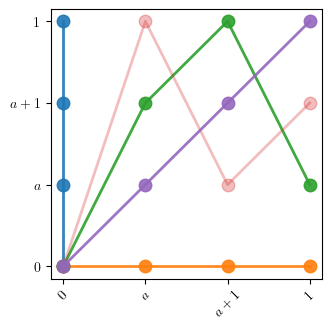

In [28]:
plotAffine(list(F), lines)

In [12]:
# plt.savefig('../imgs/affine-desargues-3-1.pgf')

In [29]:
def symplecticForm(a, b):
    a1, a2 = a
    b1, b2 = b
    return (a1 * b2 - a2 * b1).trace()

In [30]:
# brute force check that each line is an isotropic subspace
def checkSpread(lines, k=-1):
    for a in lines[k]:
        for b in lines[k]:
            if symplecticForm(a, b) != 0:
                print(a, b)
                raise Exception('Not isotropic!')
    return True

In [32]:
checkSpread(lines)

True

In [16]:
mubs = np.load('MUBS/2-2-desarguesian.npy')
mubs.shape

(20, 4)

In [17]:
mubs[4:,:] = mubs[4:, [0,3,1,2]]

In [18]:
mubs[8:12]

array([[ 0.5+0.j ,  0.5+0.j ,  0.5+0.j ,  0.5+0.j ],
       [-0.5+0.j ,  0.5+0.j , -0.5+0.j ,  0.5+0.j ],
       [ 0. -0.5j,  0. -0.5j,  0. +0.5j,  0. +0.5j],
       [ 0. -0.5j,  0. +0.5j,  0. +0.5j,  0. -0.5j]], dtype=complex64)

---

In [19]:
F = GF(2**3, 'a'); a = F.gen()
list(F)

[0, a, a^2, a + 1, a^2 + a, a^2 + a + 1, a^2 + 1, 1]

In [20]:
F = [0] + [a**i for i in range(7)]
F

[0, 1, a, a^2, a + 1, a^2 + a, a^2 + a + 1, a^2 + 1]

In [21]:
lines = DesarguesSpread(F)

(<Figure size 350x350 with 1 Axes>, <Axes: >)

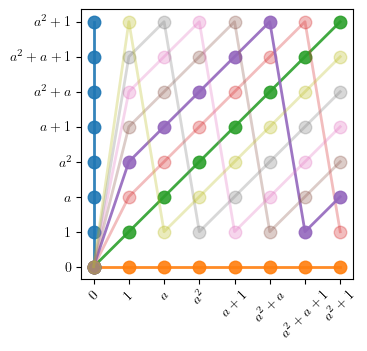

In [22]:
plotAffine(F, lines)